In [60]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pm4py

In [61]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [62]:
if __name__ == "__main__":
    dataframe = pd.read_csv('event_log.txt', sep=',')
    dataframe = dataframe.rename(columns={'productID': 'case:productID'})
    dataframe = pm4py.format_dataframe(dataframe, case_id='case_id', activity_key='activity_id', timestamp_key='time_stamp')
    event_log = pm4py.convert_to_event_log(dataframe)

/tmp/ipykernel_4690/363486717.py:4: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe = pm4py.format_dataframe(dataframe, case_id='case_id', activity_key='activity_id', timestamp_key='time_stamp')
/home/202119040556/.local/lib/python3.9/site-packages/pm4py/utils.py:495: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [63]:
event_log

[{'attributes': {'concept:name': '0'}, 'events': [{'case_id': 0, 'activity_id': 0, 'time_stamp': Timestamp('2023-09-24 09:30:55+0000', tz='UTC'), 'product_id': 0, 'concept:name': '0', 'time:timestamp': Timestamp('2023-09-24 09:30:55+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'case_id': 0, 'activity_id': 1, 'time_stamp': Timestamp('2023-09-24 09:31:15+0000', tz='UTC'), 'product_id': 0, 'concept:name': '1', 'time:timestamp': Timestamp('2023-09-24 09:31:15+0000', tz='UTC'), '@@index': 1, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': '99'}, 'events': [{'case_id': 99, 'activity_id': 2, 'time_stamp': Timestamp('2023-09-24 10:03:55+0000', tz='UTC'), 'product_id': 99, 'concept:name': '2', 'time:timestamp': Timestamp('2023-09-24 10:03:55+0000', tz='UTC'), '@@index': 336, '@@case_index': 189}, '..', {'case_id': 99, 'activity_id': 1, 'time_stamp': Timestamp('2023-09-24 10:17:55+0000', tz='UTC'), 'product_id': 99, 'concept:name': '1', 'time:timestamp': Timestamp('20

In [64]:
## Printing the first trace
event_log[10]  

{'attributes': {'concept:name': '107'}, 'events': [{'case_id': 107, 'activity_id': 2, 'time_stamp': Timestamp('2023-09-24 10:06:35+0000', tz='UTC'), 'product_id': 107, 'concept:name': '2', 'time:timestamp': Timestamp('2023-09-24 10:06:35+0000', tz='UTC'), '@@index': 20, '@@case_index': 10}]}

In [65]:
## printing the first event in first trace
event_log[0][0] 

{'case_id': 0, 'activity_id': 0, 'time_stamp': Timestamp('2023-09-24 09:30:55+0000', tz='UTC'), 'product_id': 0, 'concept:name': '0', 'time:timestamp': Timestamp('2023-09-24 09:30:55+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}

In [66]:
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter

In [67]:
#Filter on case performance
filtered_log = pm4py.filter_case_performance(event_log, 0, 10)
filtered_log

[{'attributes': {'concept:name': '107'}, 'events': [{'case_id': 107, 'activity_id': 2, 'time_stamp': Timestamp('2023-09-24 10:06:35+0000', tz='UTC'), 'product_id': 107, 'concept:name': '2', 'time:timestamp': Timestamp('2023-09-24 10:06:35+0000', tz='UTC'), '@@index': 20, '@@case_index': 10}]}, '....', {'attributes': {'concept:name': '230'}, 'events': [{'case_id': 230, 'activity_id': 0, 'time_stamp': Timestamp('2023-09-24 10:20:15+0000', tz='UTC'), 'product_id': 230, 'concept:name': '0', 'time:timestamp': Timestamp('2023-09-24 10:20:15+0000', tz='UTC'), '@@index': 171, '@@case_index': 106}]}]

In [68]:
# Printing the start activity in our log
log_start = start_activities_filter.get_start_activities(event_log)
log_start  

{'0': 116, '2': 74}

In [69]:
# Printing the end activity in our log
end_activities = end_activities_filter.get_end_activities(event_log)
end_activities  

{'1': 148, '2': 21, '0': 21}

In [70]:
#Before applying one of the many process mining algorithms, 
#it will be informatives if we get some statistics describing our
#log and process will start by understanding how many variants we have? how many cases in each variant?
#A process variant is a unique path from the very beginning to the very end of the process

from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics
variants = variants_filter.get_variants(event_log)
print(f"We have:{len(variants)} variants in our log")

We have:4 variants in our log


In [71]:
## Let's try to understand how many cases do those operations sequences variants have?

variants_count = case_statistics.get_variant_statistics(event_log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
variants_count[:10] ## Printing the top 10 variants by case number

[{'variant': ('0', '1'), 'count': 95},
 {'variant': ('2', '1'), 'count': 53},
 {'variant': ('2',), 'count': 21},
 {'variant': ('0',), 'count': 21}]

In [72]:
## Let's see what activities do we have in log? including their frequencies and considering all cases(no filter)

from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(event_log, "concept:name")
activities

{'0': 116, '1': 148, '2': 74}

## 1. Alpha Miner:
The starting point for the Alpha algorithm are ordering relations (sorted by timestamp ofc) So, we do not consider the frequencies nor we consider other attributes!

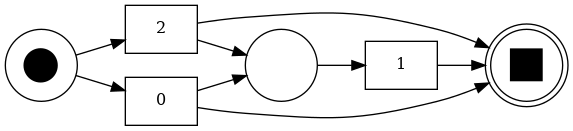

In [73]:
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'
net, initial_marking, final_marking = alpha_miner.apply(event_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants :: 100%|██████████| 4/4 [00:00<00:00, 3433.73it/s]


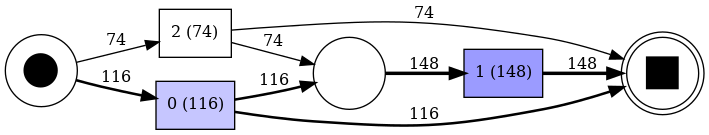

In [74]:
## Adding frequency

parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)
pn_visualizer.view(gviz)

## 2. Inductive minner

As per PM4Py documentation, The basic idea of Inductive Miner is about detecting a 'cut' in the log (e.g. sequential cut, parallel cut, concurrent cut and loop cut) and then recur on sublogs, which were found applying the cut, until a base case is found. The Directly-Follows variant avoids the recursion on the sublogs but uses the Directly Follows graph

" * " is the loop, "->" is the sequence operator, "X" is the exclusive choice

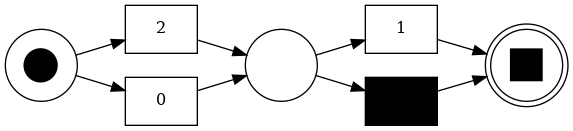

In [75]:
## In case you want to Convert the inductive miner into petri-net

net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)

gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

## 3. Heuristic Miner
Heuristics Miner is an algorithm that acts on the Directly-Follows Graph. The output of the Heuristics Miner is an Heuristics Net

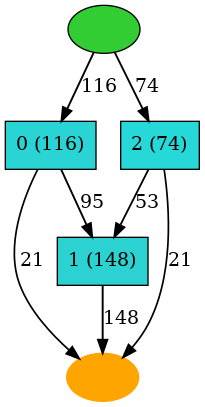

In [76]:
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.5})
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

## 4. DFG - Direct flows graph with frequency and time between the edges

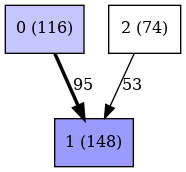

In [77]:
## First let's take the frequency:

dfg = dfg_discovery.apply(event_log)

from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

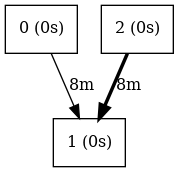

In [78]:
## Let's now take how much time it takes to travel between activities in our process

dfg = dfg_discovery.apply(event_log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz = dfg_visualization.apply(dfg, log=event_log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

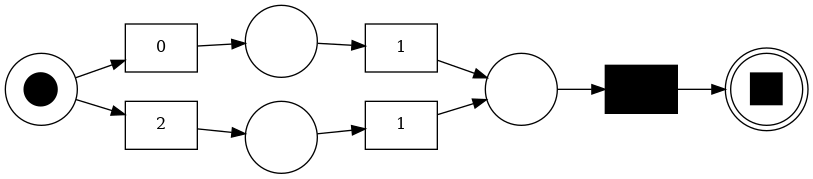

In [79]:
# Convert Directly-Follows Graph to a Workflow Net

from pm4py.objects.conversion.dfg import converter as dfg_mining
net, im, fm = dfg_mining.apply(dfg)
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

In [80]:
# Calculate all cases duration and describe
all_case_durations = pm4py.get_all_case_durations(event_log)
all_case_durations_min = [x / 60 for x in all_case_durations]
pd.Series(all_case_durations_min).describe()

count    190.000000
mean       6.445614
std        5.216221
min        0.000000
25%        1.000000
50%        6.166667
75%       11.333333
max       14.000000
dtype: float64

In [81]:
all_case_durations_min

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.3333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.6666666666666667,
 1.6666666666666667,
 1.6666666666666667,
 2.0,
 2.0,
 2.0,
 2.3333333333333335,
 2.3333333333333335,
 2.3333333333333335,
 2.6666666666666665,
 2.6666666666666665,
 2.6666666666666665,
 3.0,
 3.0,
 3.0,
 3.3333333333333335,
 3.3333333333333335,
 3.3333333333333335,
 3.6666666666666665,
 3.6666666666666665,
 3.6666666666666665,
 4.0,
 4.0,
 4.0,
 4.333333333333333,
 4.333333333333333,
 4.333333333333333,
 4.666666666666667,
 4.666666666666667,
 4.666666666666667,
 5.0,
 5.0,
 5.0,
 5.333333333333333,
 5.333333333333333,
 5.333333333333

In [82]:
# remove outliers (z_score) from all cases duration and describe
import numpy as np
import pandas as pd

def remove_outlier_z(data_1):
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    data_2 = data_1
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            data_2.remove(y)
    return data_2

acd_min_outliers_z =remove_outlier_z(all_case_durations_min)
pd.Series(acd_min_outliers_z).describe()

count    190.000000
mean       6.445614
std        5.216221
min        0.000000
25%        1.000000
50%        6.166667
75%       11.333333
max       14.000000
dtype: float64

In [83]:
# remove outliers (iqr) from all cases duration and describe

def remove_outlier_iqr(data_1):
    q1, q3= np.percentile(data_1,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)     
    data_2 = data_1
    for y in data_1: 
        if np.abs(y) > upper_bound or np.abs(y) < lower_bound:
            data_2.remove(y)      
    return data_2

acd_min_outliers_iqr =remove_outlier_iqr(all_case_durations_min)
pd.Series(acd_min_outliers_iqr).describe()

count    190.000000
mean       6.445614
std        5.216221
min        0.000000
25%        1.000000
50%        6.166667
75%       11.333333
max       14.000000
dtype: float64

In [84]:
acd_min_outliers_iqr

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.3333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.6666666666666667,
 1.6666666666666667,
 1.6666666666666667,
 2.0,
 2.0,
 2.0,
 2.3333333333333335,
 2.3333333333333335,
 2.3333333333333335,
 2.6666666666666665,
 2.6666666666666665,
 2.6666666666666665,
 3.0,
 3.0,
 3.0,
 3.3333333333333335,
 3.3333333333333335,
 3.3333333333333335,
 3.6666666666666665,
 3.6666666666666665,
 3.6666666666666665,
 4.0,
 4.0,
 4.0,
 4.333333333333333,
 4.333333333333333,
 4.333333333333333,
 4.666666666666667,
 4.666666666666667,
 4.666666666666667,
 5.0,
 5.0,
 5.0,
 5.333333333333333,
 5.333333333333333,
 5.333333333333

## SCRATCH

In [85]:
case_arrival_ratio = pm4py.get_case_arrival_average(event_log)
case_arrival_ratio

15.661375661375661

In [86]:
from pm4py.statistics.traces.generic.log import case_arrival
case_dispersion_ratio = case_arrival.get_case_dispersion_avg(event_log, parameters={
        case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})
case_dispersion_ratio

15.555555555555555

In [87]:
from pm4py.utils import get_properties
from pm4py.statistics.traces.cycle_time.log import get as cycle_time
cycle_time = cycle_time.apply(event_log, parameters={
        case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})
cycle_time

0.0

In [88]:
import pm4py
from pm4py.statistics.rework.cases.log import get as cases_rework_get
if __name__ == "__main__":
    dictio = cases_rework_get.apply(event_log) 
dictio

{'0': {'number_activities': 2, 'rework': 0},
 '1': {'number_activities': 2, 'rework': 0},
 '10': {'number_activities': 2, 'rework': 0},
 '100': {'number_activities': 2, 'rework': 0},
 '101': {'number_activities': 2, 'rework': 0},
 '102': {'number_activities': 2, 'rework': 0},
 '103': {'number_activities': 2, 'rework': 0},
 '104': {'number_activities': 2, 'rework': 0},
 '105': {'number_activities': 2, 'rework': 0},
 '106': {'number_activities': 2, 'rework': 0},
 '107': {'number_activities': 1, 'rework': 0},
 '108': {'number_activities': 2, 'rework': 0},
 '109': {'number_activities': 1, 'rework': 0},
 '11': {'number_activities': 2, 'rework': 0},
 '110': {'number_activities': 2, 'rework': 0},
 '111': {'number_activities': 1, 'rework': 0},
 '112': {'number_activities': 2, 'rework': 0},
 '113': {'number_activities': 1, 'rework': 0},
 '114': {'number_activities': 2, 'rework': 0},
 '115': {'number_activities': 1, 'rework': 0},
 '116': {'number_activities': 2, 'rework': 0},
 '117': {'number_ac